In [54]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [55]:
grd = pd.read_csv("/content/graphene_data_final.csv")

In [56]:
X, Y = grd[['Graphene_percentage', 'FEED', 'RPM', 'DOC']], grd['MRR_gm_per_sec']
Y2 = grd['Ra']

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train, X_test, Y2_train, Y2_test = train_test_split(X, Y2, test_size=0.3, random_state=16)

In [58]:
gbr = GradientBoostingRegressor(random_state=0)

In [59]:
gbr.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=0)

In [60]:
param_grid = { 
    'n_estimators': [30,40,50,70,100,150,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,3,4,5,6,7,8,9],
}

In [61]:
gbr.score(X_test,Y_test)

-0.07806524884006816

In [62]:
gbr.score(X_train, Y_train)

0.665823006958479

In [63]:
gbr2 = GradientBoostingRegressor(random_state=0)

In [64]:
cross_validate(gbr2, X, Y, cv=4)['test_score']

array([0.86241655, 0.78841607, 0.89166897, 0.8898712 ])

Text(0, 0.5, 'Score')

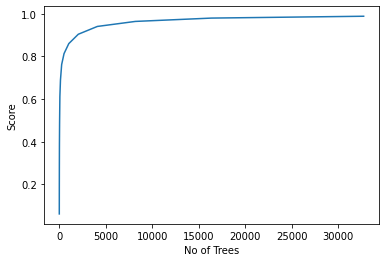

In [65]:
x_ =[]
y_ =[]
ls_ = [1,2,4,8,16,32,64,128,256,512,1024,2048,4096,8192,16384,32768]
for i in ls_:
  y_.append(GradientBoostingRegressor(n_estimators=i).fit(X_train, Y_train).score(X_train, Y_train))
  x_.append(i)
plt.plot(x_,y_)
plt.xlabel('No of Trees')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

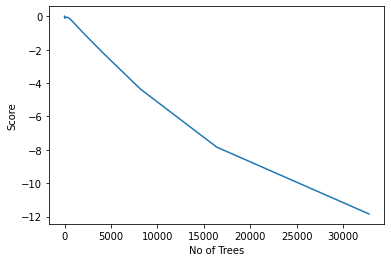

In [66]:
x_ =[]
y_ =[]
ls_ = [1,2,4,8,16,32,64,128,256,512,1024,2048,4096,8192,16384,32768]
for i in ls_:
  y_.append(GradientBoostingRegressor(n_estimators=i).fit(X_train, Y_train).score(X_test, Y_test))
  x_.append(i)
plt.plot(x_,y_)
plt.xlabel('No of Trees')
plt.ylabel('Score')